In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.api import OLS

In [4]:
combined = pd.read_csv("./data/combined.csv",
                        parse_dates=[0], index_col=0)
combined

,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,precipitation,temperature,irradiance_surface,irradiance_toa,snowfall,snow_mass,cloud_cover,air_density
2014-01-01 00:00:00+00:00,36012,0.0,32425,8086.0,4.981596,0.0,0.0,0.0364,-1.146,0.0,0.0,0.0056,0.2378,0.9562,1.2539
2014-01-01 01:00:00+00:00,36012,0.0,32425,8803.0,4.932105,0.0,0.0,0.0449,-1.104,0.0,0.0,0.0074,0.2428,0.9672,1.2535
2014-01-01 02:00:00+00:00,36012,0.0,32425,8970.0,4.865019,0.0,0.0,0.0513,-1.059,0.0,0.0,0.0129,0.2521,0.9733,1.2530
2014-01-01 03:00:00+00:00,36012,0.0,32425,8510.0,4.842338,0.0,0.0,0.0544,-0.926,0.0,0.0,0.0140,0.2642,0.9651,1.2523
2014-01-01 04:00:00+00:00,36012,0.0,32425,8360.0,4.772505,0.0,0.0,0.0512,-0.746,0.0,0.0,0.0144,0.2764,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,40634,0.0,49021,15303.0,4.212916,0.0,0.0,0.0098,-1.970,0.0,0.0,0.0017,0.0931,0.5102,1.2751
2016-12-31 20:00:00+00:00,40634,0.0,49021,15354.0,4.287475,0.0,0.0,0.0099,-2.130,0.0,0.0,0.0020,0.0944,0.5235,1.2756
2016-12-31 21:00:00+00:00,40634,0.0,49021,14848.0,4.296530,0.0,0.0,0.0093,-2.293,0.0,0.0,0.0020,0.0959,0.5248,1.2759
2016-12-31 22:00:00+00:00,40634,0.0,49021,15056.0,4.419977,0.0,0.0,0.0093,-2.443,0.0,0.0,0.0021,0.0973,0.5319,1.2760


# Prediction of wind power generation based on weather data

In [5]:
wind = combined[['wind_generation_actual', 'wind_capacity', 'windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
X_wind = wind[['wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density']]
y_wind = wind['wind_generation_actual']
wind

,wind_generation_actual,wind_capacity,windspeed_10m,radiation_direct_horizontal,radiation_diffuse_horizontal,irradiance_surface,irradiance_toa,precipitation,snowfall,cloud_cover,air_density
2014-01-01 00:00:00+00:00,8086.0,32425,4.981596,0.0,0.0,0.0,0.0,0.0364,0.0056,0.9562,1.2539
2014-01-01 01:00:00+00:00,8803.0,32425,4.932105,0.0,0.0,0.0,0.0,0.0449,0.0074,0.9672,1.2535
2014-01-01 02:00:00+00:00,8970.0,32425,4.865019,0.0,0.0,0.0,0.0,0.0513,0.0129,0.9733,1.2530
2014-01-01 03:00:00+00:00,8510.0,32425,4.842338,0.0,0.0,0.0,0.0,0.0544,0.0140,0.9651,1.2523
2014-01-01 04:00:00+00:00,8360.0,32425,4.772505,0.0,0.0,0.0,0.0,0.0512,0.0144,0.9370,1.2516
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+00:00,15303.0,49021,4.212916,0.0,0.0,0.0,0.0,0.0098,0.0017,0.5102,1.2751
2016-12-31 20:00:00+00:00,15354.0,49021,4.287475,0.0,0.0,0.0,0.0,0.0099,0.0020,0.5235,1.2756
2016-12-31 21:00:00+00:00,14848.0,49021,4.296530,0.0,0.0,0.0,0.0,0.0093,0.0020,0.5248,1.2759
2016-12-31 22:00:00+00:00,15056.0,49021,4.419977,0.0,0.0,0.0,0.0,0.0093,0.0021,0.5319,1.2760


# Split the dataset into training and test datasets

In [6]:
# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master = X_wind.loc[(X_wind.index >= "2014-01-01 00:00:00") & (X_wind.index <= "2015-12-31 23:00:00")]
y_train = y_wind.loc[(X_wind.index >= "2014-01-01 00:00:00") & (X_wind.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master = X_wind.loc[(X_wind.index >= "2016-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]
y_test = y_wind.loc[(X_wind.index >= "2016-01-01 00:00:00") & (X_wind.index <= "2016-12-31 23:00:00")]

# 1. Predicting wind power generation using the LinearRegression model

## 1.1 Training and validation of the LinearRegression model for all features (n=10)

### Cross-validation
In order to evaluate the performance of the algorithm, we divide the data using a procedure called cross-validation (cv for short). For the k-fold cv, the dataset is split into k smaller sets or ‘folds’, the model is trained in k-1 of those folds, and the resulting model is validated on the remaining part of the data. The performance measure provided by the cv is then the average of the performance measure computed in each experiment. 
In the code below, we use cross_val_score from sklearn.model_selection, with number of folds cv=5

The performance measure that LinearRegression gives by default is the coefficient of determination R² of the prediction. It measures how well the predictions approximate the true values.

In [6]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [7]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.800
The R2 score of the LinearRegression model (test) is: 0.805


In [8]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     wind_generation_actual   R-squared (uncentered):                   0.943
Model:                                OLS   Adj. R-squared (uncentered):              0.943
Method:                     Least Squares   F-statistic:                          2.896e+04
Date:                    Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                            03:01:48   Log-Likelihood:                     -1.6066e+05
No. Observations:                   17503   AIC:                                  3.213e+05
Df Residuals:                       17493   BIC:                                  3.214e+05
Df Model:                              10                                                  
Covariance Type:                nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
wind_capacity                    0.3473      0.005     67.610      0.000       0.337       0.357
windspeed_10m                 3284.8208     10.414    315.418      0.000    3264.408    3305.234
radiation_direct_horizontal     -4.0211      0.378    -10.626      0.000      -4.763      -3.279
radiation_diffuse_horizontal   -12.5106      0.609    -20.533      0.000     -13.705     -11.316
irradiance_surface               5.8832      0.741      7.935      0.000       4.430       7.336
irradiance_toa                  -3.9745      0.442     -9.000      0.000      -4.840      -3.109
precipitation                -3805.8757    162.323    -23.446      0.000   -4124.045   -3487.706
snowfall                     -7831.5211    796.997     -9.826      0.000   -9393.714   -6269.328
cloud_cover                   1643.0857     89.491     18.360      0.000    1467.675    1818.496
air_density                  -1.536e+04    168.745    -91.008      0.000   -1.57e+04    -1.5e+04
==============================================================================
Omnibus:                      477.995   Durbin-Watson:                   0.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1037.368
Skew:                           0.150   Prob(JB):                    5.48e-226
Kurtosis:                       4.154   Cond. No.                     1.69e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

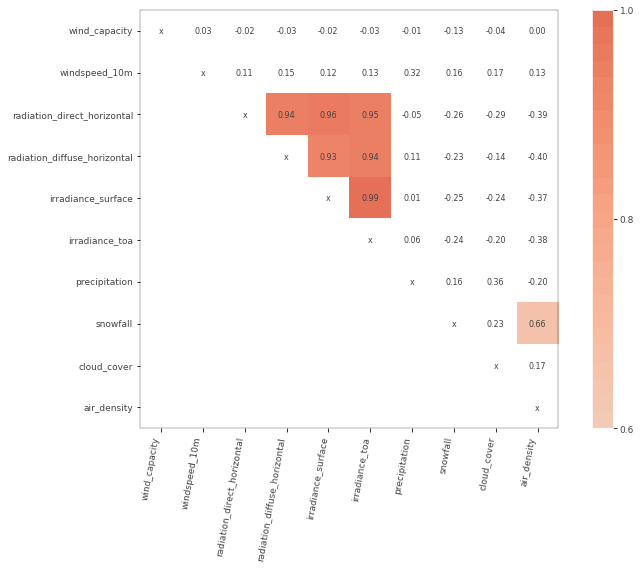

In [10]:
# Let's check for multicollinearity amongst the different features
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

- It seems that there is a strong multicollinearity between the different features for solar radiation/irradiance.
- We choose to only use `irradiance_surface` to feature solar radiation/irrandiance and to drop the other related features (see below why).
- Thus we decide to re-train and validate the models by limiting the features to: 
#### `wind_capacity`,`windspeed_10m`, `irradiance_surface`, `precipitation`, `snowfall`, `cloud_cover` and `air_density`
#### `irradiance_surface` (only)

## 1.2 Training and validation of the LinearRegression model for selected features (n=7)

In [11]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [14]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.771
The R2 score of the LinearRegression model (test) is: 0.784


#### While dropping 3 features for wind radiation/irradiance, the goodness of fit of this model is no signicantly different than for the model in 1.1 with 10 features.

In [13]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     wind_generation_actual   R-squared (uncentered):                   0.936
Model:                                OLS   Adj. R-squared (uncentered):              0.936
Method:                     Least Squares   F-statistic:                          3.638e+04
Date:                    Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                            03:03:15   Log-Likelihood:                     -1.6172e+05
No. Observations:                   17503   AIC:                                  3.235e+05
Df Residuals:                       17496   BIC:                                  3.235e+05
Df Model:                               7                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
wind_capacity          0.3451      0.005     63.325      0.000       0.334       0.356
windspeed_10m       3233.9058     10.990    294.256      0.000    3212.364    3255.448
irradiance_surface    -7.2457      0.091    -79.353      0.000      -7.425      -7.067
precipitation      -5083.4499    165.449    -30.725      0.000   -5407.747   -4759.153
snowfall           -4257.4093    842.185     -5.055      0.000   -5908.176   -2606.643
cloud_cover          659.9448     91.096      7.245      0.000     481.388     838.502
air_density        -1.482e+04    178.788    -82.866      0.000   -1.52e+04   -1.45e+04
==============================================================================
Omnibus:                      396.316   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.948
Skew:                           0.082   Prob(JB):                    5.56e-189
Kurtosis:                       4.078   Cond. No.                     1.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 1.3 Training and validation of the LinearRegression model for selected features (n=1)

In [15]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [16]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"The average score for the LinearRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
lr.fit(X_train, y_train)
predictions_lr = lr.predict(X_test)
r2 = r2_score(y_test, predictions_lr)
print(f"The R2 score of the LinearRegression model (test) is: %0.3f" % r2)

The average score for the LinearRegression model (training) is: 0.628
The R2 score of the LinearRegression model (test) is: 0.645


In [17]:
# Further information on the LinearRegression model
OLS(y_train, X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     wind_generation_actual   R-squared (uncentered):                   0.844
Model:                                OLS   Adj. R-squared (uncentered):              0.844
Method:                     Least Squares   F-statistic:                          9.489e+04
Date:                    Thu, 21 May 2020   Prob (F-statistic):                        0.00
Time:                            03:04:40   Log-Likelihood:                     -1.6947e+05
No. Observations:                   17503   AIC:                                  3.389e+05
Df Residuals:                       17502   BIC:                                  3.389e+05
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
windspeed_10m  1978.1493      6.422    308.049      0.000    1965.562    1990.736
==============================================================================
Omnibus:                     3022.318   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4959.603
Skew:                           1.174   Prob(JB):                         0.00
Kurtosis:                       4.137   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### By using only the feature `windspeed_10m`, the LinearRegression model could not achieve a satisfying goodness of fit.

# 2. Predicting wind power generation using the DecisionTreeRegression model

## 2.1 Training and validation of the DecisionTreeRegression model for all features (n=10)

In [18]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [19]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.724
The R2 score of the DecisionTreeRegression model (test) is: 0.650


## 2.2 Training and validation of the DecisionTreeRegression model for selected features (n=7)

In [20]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [21]:
# Frist, we train the model for the prediction for solar power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.683
The R2 score of the DecisionTreeRegression model (test) is: 0.625


## 2.3 Training and validation of the DecisionTreeRegression model for selected features (n=1)

In [22]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [23]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
dt = DecisionTreeRegressor()
scores = cross_val_score(dt, X_train, y_train, cv=5)
print(f"The average score for the DecisionTreeRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
dt.fit(X_train, y_train)
predictions_dt = dt.predict(X_test)
r2 = r2_score(y_test, predictions_dt)
print(f"The R2 score of the DecisionTreeRegression model (test) is: %0.3f" % r2)

The average score for the DecisionTreeRegression model (training) is: 0.299
The R2 score of the DecisionTreeRegression model (test) is: 0.454


##### The DecisionTreeRegression model seems to be less effective than the LinearRegression model

# 3. Predicting wind power generation using the RandomForestRegression model

## 3.1 Training and validation of the RandomForestRegression model for all features (n=10)

In [25]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [26]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.842
The R2 score of the RandomForestRegression model (test) is: 0.765


## 3.2 Training and validation of the RandomForestRegression model for selected features (n=7)

In [27]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [28]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.827
The R2 score of the RandomForestRegression model (test) is: 0.770


## 3.3 Training and validation of the RandomForestRegression model for selected features (n=1)

In [29]:
selected_features = ['windspeed_10m']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [30]:
# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

The average score for the RandomForestRegression model (training) is: 0.483
The R2 score of the RandomForestRegression model (test) is: 0.559


##### Besides requiring much more computing resources, the RandomForestRegression model does not seem as effective as the LinearRegression model when the sole feature `windspeed_10m` is considered for the modeling. 

## 3.3 Optimization of the RandomForestRegression model for selected features

### 3.3.1 Model optimization by varying the number of decison trees in the RandomForestRegression model

In [31]:
selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'irradiance_surface',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density']

X_train = X_train_master[selected_features]
X_test = X_test_master[selected_features]

In [32]:
# Check the behaviour of the RandomForestRegression with the following number of decision trees
list_no_trees = [2, 5, 10, 20, 50, 100, 200]

for i in range(len(list_no_trees)):
    rf = RandomForestRegressor(n_estimators=list_no_trees[i])
    print(f"\nFor a RandomForestRegression model with {list_no_trees[i]} decision trees:")
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"The average score for the training of the model is: %0.3f" % np.mean(scores))
    rf.fit(X_train, y_train)
    predictions_rf = rf.predict(X_test)
    r2 = r2_score(y_test, predictions_rf)
    print(f"The R2 score for the validation of the model is: %0.3f" % r2)


For a RandomForestRegression model with 2 decision trees:
The average score for the training of the model is: 0.749
The R2 score for the validation of the model is: 0.683

For a RandomForestRegression model with 5 decision trees:
The average score for the training of the model is: 0.804
The R2 score for the validation of the model is: 0.759

For a RandomForestRegression model with 10 decision trees:
The average score for the training of the model is: 0.818
The R2 score for the validation of the model is: 0.764

For a RandomForestRegression model with 20 decision trees:
The average score for the training of the model is: 0.823
The R2 score for the validation of the model is: 0.762

For a RandomForestRegression model with 50 decision trees:
The average score for the training of the model is: 0.825
The R2 score for the validation of the model is: 0.763

For a RandomForestRegression model with 100 decision trees:
The average score for the training of the model is: 0.827
The R2 score for t

##### A RandomForestRegression model with 20 decision trees seems to be a satisfying compromise for model performance and goodness to fit

### 3.3.2 Model optimization by identifying the most predictive features

In [33]:
# We intend to find out which features are most predictive of the wind power generation.

# In order to explain feature selection, we add a column of random numbers. 
# Any feature less important than a random column should be tossed out.

np.random.seed(seed = 42)
wind_2 = wind.copy()
wind_2['random'] = np.random.random(size = len(X_wind))

X_wind_2 = wind_2[['wind_capacity','windspeed_10m', 'radiation_direct_horizontal', 'radiation_diffuse_horizontal', 'irradiance_surface', 'irradiance_toa', 'precipitation', 'snowfall', 'cloud_cover', 'air_density', 'random']]
y_wind = wind_2['wind_generation_actual']


# We will train the machine learning algorithms on the data for the years 2014 and 2015
X_train_master_2 = X_wind_2.loc[(X_wind_2.index >= "2014-01-01 00:00:00") & (X_wind_2.index <= "2015-12-31 23:00:00")]
y_train = y_wind.loc[(X_wind_2.index >= "2014-01-01 00:00:00") & (X_wind_2.index <= "2015-12-31 23:00:00")]

# We will test the models on the data for the year 2016
X_test_master_2 = X_wind_2.loc[(X_wind_2.index >= "2016-01-01 00:00:00") & (X_wind_2.index <= "2016-12-31 23:00:00")]
y_test = y_wind.loc[(X_wind_2.index >= "2016-01-01 00:00:00") & (X_wind_2.index <= "2016-12-31 23:00:00")]

selected_features = ['wind_capacity',
                     'windspeed_10m',
                     'radiation_direct_horizontal',
                     'radiation_diffuse_horizontal',
                     'irradiance_surface',
                     'irradiance_toa',
                     'precipitation',
                     'snowfall',
                     'cloud_cover',
                     'air_density',
                     'random']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

In [34]:
rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)

rf_features_dict = {}

for score, feat in zip(map(lambda x: round(x, 3), rf.feature_importances_), X_train.columns):
    rf_features_dict[feat] = score
    
rf_features_dict_sorted = sorted(rf_features_dict.items(), key=lambda x: x[1], reverse=True)

df= pd.DataFrame(rf_features_dict_sorted, columns=['features', 'importances'])

print("Features sorted by their score for the RandomForestRegression model:")
df

Features sorted by their score for the RandomForestRegression model:


,features,importances
0,windspeed_10m,0.793
1,wind_capacity,0.084
2,radiation_diffuse_horizontal,0.049
3,precipitation,0.016
4,air_density,0.015
5,radiation_direct_horizontal,0.010
6,cloud_cover,0.010
7,irradiance_toa,0.008
8,snowfall,0.007
9,irradiance_surface,0.005


In [35]:
from rfpimp import importances
importances(rf, X_test, y_test)

,Importance
Feature,
windspeed_10m,1.832635
radiation_diffuse_horizontal,0.071685
irradiance_toa,0.021981
precipitation,0.013167
irradiance_surface,0.005540
snowfall,0.004368
random,0.000397
wind_capacity,0.000000
air_density,-0.000151


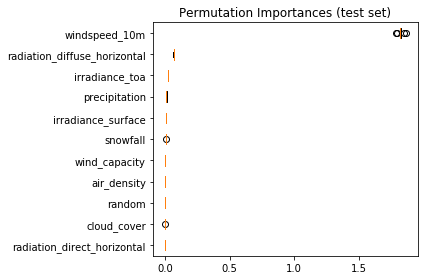

In [36]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py

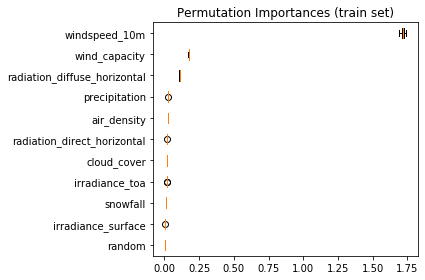

In [37]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [38]:
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 0.993
RF test accuracy: 0.760


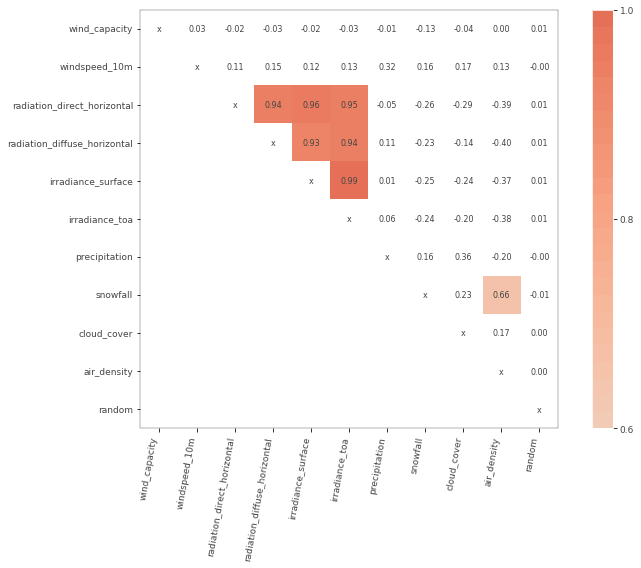

In [39]:
viz = plot_corr_heatmap(X_train, figsize=(12,8))
viz.view()

In [40]:
selected_features = ['windspeed_10m',
                     'radiation_diffuse_horizontal',
                     'precipitation',
                     'snowfall']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.716
The R2 score of the RandomForestRegression model (test) is: 0.721
RF train accuracy: 0.980
RF test accuracy: 0.721


In [41]:
selected_features = ['windspeed_10m']

X_train = X_train_master_2[selected_features]
X_test = X_test_master_2[selected_features]

# Frist, we train the model for the prediction for wind power generation based on weather data.
rf = RandomForestRegressor(n_estimators=20)
scores = cross_val_score(rf, X_train, y_train, cv=5)
print(f"The average score for the RandomForestRegression model (training) is: %0.3f" % np.mean(scores))

# Second, we validate the model for the data for the year 2016.
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)
r2 = r2_score(y_test, predictions_rf)
print(f"The R2 score of the RandomForestRegression model (test) is: %0.3f" % r2)

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

The average score for the RandomForestRegression model (training) is: 0.471
The R2 score of the RandomForestRegression model (test) is: 0.555
RF train accuracy: 0.949
RF test accuracy: 0.555
